# Case study: CNN Transfer Learning 

# Ibean Leaf Dataset

### Context

This dataset is of leaf images taken in the field in different districts in Uganda by the Makerere AI lab in collaboration with the National Crops Resources Research Institute (NaCRRI), the national body in charge of research in agriculture in Uganda. The data is of leaf images representing 3 classes: the healthy class of images, and two disease classes including Angular Leaf Spot and Bean Rust diseases. The model should be able to distinguish between these 3 classes with high accuracy.

### Objective

The goal is to build a robust Deep learning model that is able to distinguish between diseases in the Bean plants. Beans are an important cereal food crop for Africa grown by many small-holder farmers - they are a significant source of proteins for school-age going children in East Africa.

### Data Description
The data includes leaf images taken in the field. The figure below depicts examples of the types of images per class. Images were taken from the field/garden a basic smartphone.

![Image of IBean](https://github.com/AI-Lab-Makerere/ibean/raw/master/bean-example-data.png)

The images were then annotated by experts from NaCRRI who determined for each image which disease was manifested. The experts were part of the data collection team and images were annotated directly during the data collection process in the field.

* **Class**	        - **Examples**
* Healthy class	    - 428
* Angular Leaf Spot	- 432
* Bean Rust	        - 436
* Total:	        - 1,296


### Dataset Source: https://github.com/AI-Lab-Makerere/ibean/
### License : MIT License - https://github.com/AI-Lab-Makerere/ibean/blob/master/LICENSE

In [ ]:
# Import required libraries

# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
tensorflow.__version__

'2.8.2'

In [ ]:
import os
os.chdir('/content/drive/MyDrive/CV - Week 5/Case_Study_2/dataset')

#### Training dataset

In [ ]:
# Extracting the images and storing it in a dataframe
import cv2

file_path = 'train' 
df = pd.DataFrame(columns=['file_name','class','image'])


In [ ]:
for i in os.listdir(file_path):
    if i != '.DS_Store': #This if condition is machine specific - can be ignored 
        print(i)
        for j in os.listdir(os.path.join(file_path,i)):
            img = cv2.imread(os.path.join(file_path,i,j))
            df = df.append({'file_name':j,'class':i,'image':img},ignore_index=True)

healthy
angular_leaf_spot
bean_rust


In [ ]:
# Checking the dataframe
df.head()

,file_name,class,image
0,healthy_train.265.jpg,healthy,"[[[18, 39, 70], [22, 43, 74], [23, 41, 72], [1..."
1,healthy_train.271.jpg,healthy,"[[[104, 162, 157], [98, 158, 152], [98, 158, 1..."
2,healthy_train.311.jpg,healthy,"[[[2, 109, 52], [2, 109, 52], [5, 108, 51], [3..."
3,healthy_train.259.jpg,healthy,"[[[57, 174, 81], [47, 167, 73], [38, 158, 64],..."
4,healthy_train.99.jpg,healthy,"[[[8, 65, 20], [8, 67, 22], [12, 72, 24], [9, ..."


In [ ]:
# Checking the total number of images extracted

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1035 non-null   object
 1   class      1035 non-null   object
 2   image      1034 non-null   object
dtypes: object(3)
memory usage: 24.4+ KB


In [ ]:
# Checking if there are any empty images read

df.isnull().sum()

file_name    0
class        0
image        1
dtype: int64

In [ ]:
# As there is one empty image we can remove that row

df.dropna(inplace=True)
df.isnull().sum()

file_name    0
class        0
image        0
dtype: int64

In [ ]:
# Vizualizing the images

def sample_img(df,n):
    df = df.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class'])) 

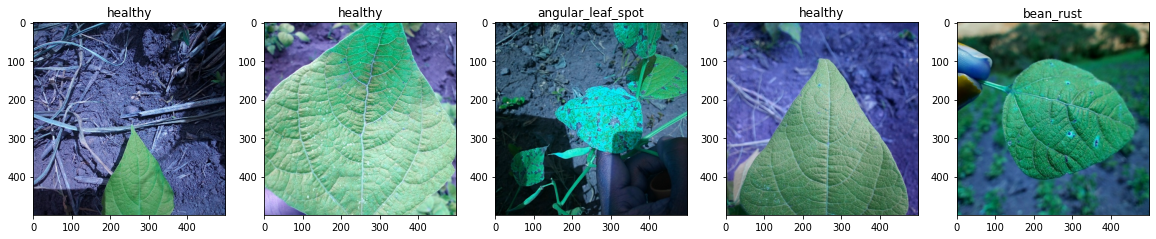

In [ ]:
sample_img(df, 5)

In [ ]:
# Creating X_train and y_train

X_tr = df['image']
y_train = df['class']

print(X_tr.shape)
print(y_train.shape)

(1034,)
(1034,)


In [ ]:
# Reshaping X_train suitable for the model

import cv2
X_train = []

for i, j in enumerate(X_tr):
    img = cv2.resize(j, (128, 128))
    X_train.append(img)
    

In [ ]:
X_train = np.array(X_train)
X_train.shape

(1034, 128, 128, 3)

#### Validation Dataset

In [ ]:
# Extracting the val_images and storing it in a dataframe

import cv2

file_path = 'validation'  
df_val = pd.DataFrame(columns=['file_name','class','image'])
for i in os.listdir(file_path):
    if i != '.DS_Store': #This if condition is machine specific - can be ignored 
        print(i)
        for j in os.listdir(os.path.join(file_path,i)):
            img = cv2.imread(os.path.join(file_path,i,j))
            df_val = df_val.append({'file_name':j,'class':i,'image':img},ignore_index=True)

angular_leaf_spot
healthy
bean_rust


In [ ]:
df_val.head()

,file_name,class,image
0,angular_leaf_spot_val.10.jpg,angular_leaf_spot,"[[[0, 65, 43], [0, 69, 47], [0, 67, 44], [0, 6..."
1,angular_leaf_spot_val.21.jpg,angular_leaf_spot,"[[[90, 255, 194], [93, 255, 190], [106, 255, 1..."
2,angular_leaf_spot_val.42.jpg,angular_leaf_spot,"[[[42, 51, 55], [48, 57, 61], [57, 66, 70], [5..."
3,angular_leaf_spot_val.26.jpg,angular_leaf_spot,"[[[7, 93, 63], [1, 87, 57], [6, 90, 61], [9, 9..."
4,angular_leaf_spot_val.6.jpg,angular_leaf_spot,"[[[116, 131, 164], [117, 134, 167], [108, 127,..."


In [ ]:
df_val.isnull().sum()

file_name    0
class        0
image        0
dtype: int64

In [ ]:
# No missing values
# Vizualizing the images

def sample_img(df_val,n):
    df_val = df_val.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df_val.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class'])) 

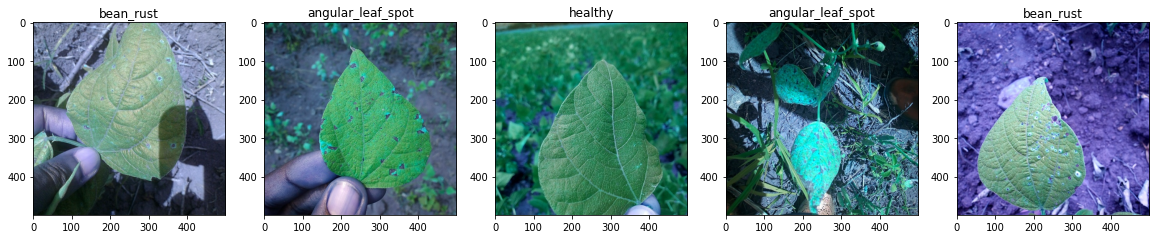

In [ ]:
sample_img(df_val, 5)

In [ ]:
# Creating X_val and y_val

X_vl = df_val['image']
y_val = df_val['class']

print(X_vl.shape)
print(y_val.shape)


# Reshaping X_train suitable for the model

import cv2
X_val = []

for i, j in enumerate(X_vl):
    img = cv2.resize(j, (128, 128))
    X_val.append(img)

X_val = np.array(X_val)
X_val.shape

(133,)
(133,)


(133, 128, 128, 3)

In [ ]:
# Normalizing the X_train and X_val

X_train = (X_train/255).astype('float32')
X_val = (X_val/255).astype('float32')

In [ ]:
# Trying to check the max and min values

print("Max and Min value in X_train:", X_train.max(), X_train.min())
print("Max and Min value in X_test:", X_val.max(), X_val.min())

Max and Min value in X_train: 1.0 0.0
Max and Min value in X_test: 1.0 0.0


In [ ]:
# Convert your target feature to one-hot vectors

y_train_onehot = pd.get_dummies(y_train)
y_val_onehot = pd.get_dummies(y_val)


print("Shape of y_train:", y_train_onehot.shape)
print("One value of y_train:", y_train_onehot)

Shape of y_train: (1034, 3)
One value of y_train:       angular_leaf_spot  bean_rust  healthy
0                     0          0        1
1                     0          0        1
2                     0          0        1
3                     0          0        1
4                     0          0        1
...                 ...        ...      ...
1030                  0          1        0
1031                  0          1        0
1032                  0          1        0
1033                  0          1        0
1034                  0          1        0

[1034 rows x 3 columns]


In [ ]:
# Initializing basic CNN model

from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Conv2D(filters=128, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))


# Compile the model
model.compile(loss="categorical_crossentropy", 
              metrics=["accuracy"], 
              optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 64)      73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      18464     
                                                                 
 flatten (Flatten)           (None, 460800)            0         
                                                                 
 dense (Dense)               (None, 64)                29491264  
                                                                 
 dense_1 (Dense)             (None, 128)               8

In [ ]:
tr_history = model.fit(x=X_train, 
                       y=y_train_onehot, 
                       batch_size=32, 
                       epochs=20, 
                       validation_data=(X_val, y_val_onehot))

Epoch 1/20
33/33 [==============================] - 14s 212ms/step - loss: 1.1952 - accuracy: 0.3298 - val_loss: 1.0988 - val_accuracy: 0.3308
Epoch 2/20
33/33 [==============================] - 5s 154ms/step - loss: 1.0988 - accuracy: 0.3366 - val_loss: 1.0945 - val_accuracy: 0.3609
Epoch 3/20
33/33 [==============================] - 5s 155ms/step - loss: 1.1035 - accuracy: 0.3820 - val_loss: 1.0986 - val_accuracy: 0.3308
Epoch 4/20
33/33 [==============================] - 5s 155ms/step - loss: 1.0990 - accuracy: 0.3221 - val_loss: 1.0987 - val_accuracy: 0.3383
Epoch 5/20
33/33 [==============================] - 5s 156ms/step - loss: 1.0989 - accuracy: 0.3356 - val_loss: 1.0967 - val_accuracy: 0.4436
Epoch 6/20
33/33 [==============================] - 5s 157ms/step - loss: 1.1419 - accuracy: 0.3936 - val_loss: 1.0989 - val_accuracy: 0.3308
Epoch 7/20
33/33 [==============================] - 5s 156ms/step - loss: 1.1373 - accuracy: 0.3453 - val_loss: 1.0990 - val_accuracy: 0.3383
Epoch

In [ ]:
model.evaluate(X_val, y_val_onehot)

5/5 [==============================] - 0s 56ms/step - loss: 1.0986 - accuracy: 0.3383


[1.0985630750656128, 0.33834585547447205]

Text(0.5, 1.0, 'Training and validation loss')

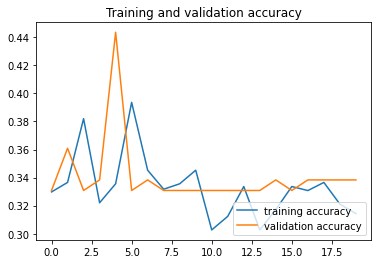

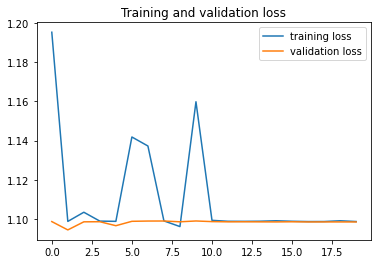

In [ ]:
## Accuracy and Loss plots

accuracy      = tr_history.history['accuracy']
val_accuracy  = tr_history.history['val_accuracy']
loss     = tr_history.history['loss']
val_loss = tr_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
# Saving the model
model.save('cnn_transfer.h5')
model.save_weights('cnn_tr_weights.h5')

In [ ]:
# Vanilla CNN + Pooling + Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(filters=128, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model1.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model1.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model1.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model1.add(Dropout(rate=0.2))

model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(3, activation="softmax"))


# Compile the model
model1.compile(loss="categorical_crossentropy", 
               metrics=["accuracy"], 
               optimizer="adam")

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 128)     147584    
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 64)      73792     
                                                                 
 conv2d_7 (Conv2D)           (None, 120, 120, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                      

In [ ]:
# Fit the model

tr_history1 = model1.fit(x=X_train, 
                         y=y_train_onehot, 
                         batch_size=64, 
                         epochs=10, 
                         validation_data=(X_val, y_val_onehot))

Epoch 1/10
17/17 [==============================] - 13s 314ms/step - loss: 1.1581 - accuracy: 0.3617 - val_loss: 1.0810 - val_accuracy: 0.3308
Epoch 2/10
17/17 [==============================] - 5s 300ms/step - loss: 1.0358 - accuracy: 0.4516 - val_loss: 1.4937 - val_accuracy: 0.3910
Epoch 3/10
17/17 [==============================] - 5s 302ms/step - loss: 1.0562 - accuracy: 0.5164 - val_loss: 0.9231 - val_accuracy: 0.6165
Epoch 4/10
17/17 [==============================] - 5s 302ms/step - loss: 0.8444 - accuracy: 0.6325 - val_loss: 0.8173 - val_accuracy: 0.6692
Epoch 5/10
17/17 [==============================] - 5s 298ms/step - loss: 0.7708 - accuracy: 0.6596 - val_loss: 0.7107 - val_accuracy: 0.6842
Epoch 6/10
17/17 [==============================] - 5s 297ms/step - loss: 0.6554 - accuracy: 0.7205 - val_loss: 0.7001 - val_accuracy: 0.6842
Epoch 7/10
17/17 [==============================] - 5s 296ms/step - loss: 0.5931 - accuracy: 0.7689 - val_loss: 0.5762 - val_accuracy: 0.7444
Epoch

In [ ]:
# Loss and Accuracy

model1.evaluate(X_val, y_val_onehot)

5/5 [==============================] - 0s 55ms/step - loss: 1.2188 - accuracy: 0.6917


[1.21879243850708, 0.6917293071746826]

Text(0.5, 1.0, 'Training and validation loss')

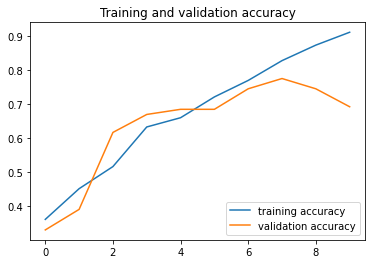

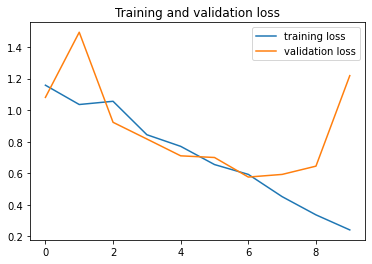

In [ ]:
## Accuracy and Loss plots

accuracy = tr_history1.history['accuracy']
val_accuracy = tr_history1.history['val_accuracy']
loss = tr_history1.history['loss']
val_loss = tr_history1.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
# Saving model and its weights for future use

model1.save('cnn_normalized.h5')
model1.save_weights('cnn_weights1.h5')

# Transfer Learning

## VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG16(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(3, activation='softmax')(x) #final layer with softmax activation

model_vgg16 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg16.layers[:20]:
    layer.trainable=False
for layer in model_vgg16.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg16.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
tr_history2 = model_vgg16.fit(x=X_train, 
                              y=y_train_onehot, 
                              batch_size=64, 
                              epochs=30, 
                              validation_data=(X_val, y_val_onehot))

Epoch 1/30
17/17 [==============================] - 16s 213ms/step - loss: 0.9010 - accuracy: 0.5803 - val_loss: 0.7488 - val_accuracy: 0.6466
Epoch 2/30
17/17 [==============================] - 2s 108ms/step - loss: 0.6188 - accuracy: 0.7418 - val_loss: 0.7018 - val_accuracy: 0.7368
Epoch 3/30
17/17 [==============================] - 2s 113ms/step - loss: 0.5553 - accuracy: 0.7708 - val_loss: 0.7388 - val_accuracy: 0.6617
Epoch 4/30
17/17 [==============================] - 2s 110ms/step - loss: 0.5416 - accuracy: 0.7785 - val_loss: 0.4675 - val_accuracy: 0.8271
Epoch 5/30
17/17 [==============================] - 2s 109ms/step - loss: 0.4183 - accuracy: 0.8308 - val_loss: 0.4687 - val_accuracy: 0.8271
Epoch 6/30
17/17 [==============================] - 2s 108ms/step - loss: 0.3939 - accuracy: 0.8453 - val_loss: 0.4392 - val_accuracy: 0.8421
Epoch 7/30
17/17 [==============================] - 2s 108ms/step - loss: 0.3382 - accuracy: 0.8665 - val_loss: 0.4289 - val_accuracy: 0.8496
Epoch

Text(0.5, 1.0, 'Training and validation loss')

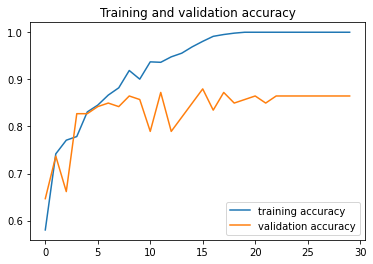

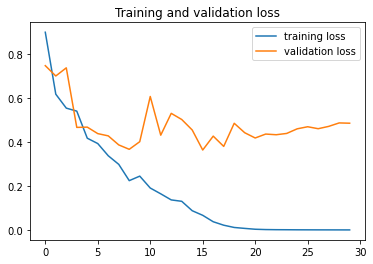

In [ ]:
## Accuracy and Loss plots

accuracy = tr_history2.history['accuracy']
val_accuracy = tr_history2.history['val_accuracy']
loss = tr_history2.history['loss']
val_loss = tr_history2.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
# Saving model weights

model_vgg16.save('vgg16.h5')
model_vgg16.save_weights('vgg16_weights.h5')

## VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(3, activation='softmax')(x) #final layer with softmax activation

model_vgg19 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg19.layers[:20]:
    layer.trainable=False
for layer in model_vgg19.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg19.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg19.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                            

In [ ]:
tr_history3 = model_vgg19.fit(x=X_train, 
                              y=y_train_onehot, 
                              batch_size=64, 
                              epochs=30, 
                              validation_data=(X_val, y_val_onehot))

Epoch 1/30
17/17 [==============================] - 4s 149ms/step - loss: 1.2259 - accuracy: 0.4236 - val_loss: 0.7511 - val_accuracy: 0.6992
Epoch 2/30
17/17 [==============================] - 2s 130ms/step - loss: 0.6869 - accuracy: 0.6818 - val_loss: 0.6280 - val_accuracy: 0.6842
Epoch 3/30
17/17 [==============================] - 2s 132ms/step - loss: 0.5542 - accuracy: 0.7418 - val_loss: 0.4968 - val_accuracy: 0.7594
Epoch 4/30
17/17 [==============================] - 2s 131ms/step - loss: 0.4346 - accuracy: 0.8191 - val_loss: 0.3677 - val_accuracy: 0.8421
Epoch 5/30
17/17 [==============================] - 2s 135ms/step - loss: 0.3449 - accuracy: 0.8627 - val_loss: 0.4364 - val_accuracy: 0.8195
Epoch 6/30
17/17 [==============================] - 2s 131ms/step - loss: 0.3291 - accuracy: 0.8685 - val_loss: 0.2980 - val_accuracy: 0.8722
Epoch 7/30
17/17 [==============================] - 2s 131ms/step - loss: 0.1924 - accuracy: 0.9217 - val_loss: 0.6671 - val_accuracy: 0.7594
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

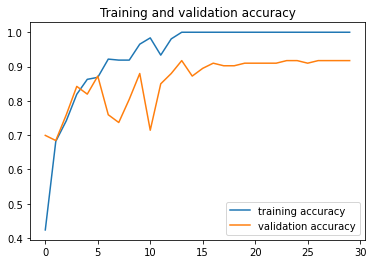

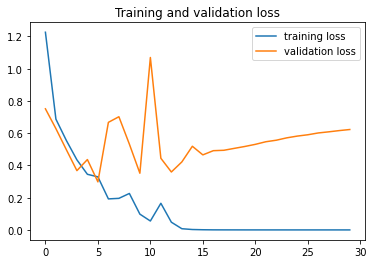

In [ ]:
## Accuracy and Loss plots

accuracy = tr_history3.history['accuracy']
val_accuracy = tr_history3.history['val_accuracy']
loss = tr_history3.history['loss']
val_loss = tr_history3.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
# Saving model and its weights for future use

model_vgg19.save('vgg19.h5')
model_vgg19.save_weights('vgg19_weights.h5')

## Resnet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(input_shape=X_train[0].shape,
                      weights='imagenet',
                      include_top=False) #imports the ResNet50 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
#x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(3, activation='softmax')(x) #final layer with softmax activation

model_resnet50 = Model(inputs=base_model.input,
                       outputs=preds)

# set the first 150 layers of the network to be non-trainable
for layer in model_resnet50.layers[:150]:
    layer.trainable=False
for layer in model_resnet50.layers[150:]:
    layer.trainable=True

# Compile the model
model_resnet50.compile(optimizer=tensorflow.optimizers.Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model_resnet50.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
tr_history4 = model_resnet50.fit(x=X_train, 
                                 y=y_train_onehot, 
                                 batch_size=8, 
                                 epochs=30, 
                                 validation_data=(X_val, y_val_onehot))

Epoch 1/30
130/130 [==============================] - 8s 35ms/step - loss: 0.9882 - accuracy: 0.5242 - val_loss: 1.2442 - val_accuracy: 0.3459
Epoch 2/30
130/130 [==============================] - 4s 27ms/step - loss: 0.7875 - accuracy: 0.6605 - val_loss: 1.0713 - val_accuracy: 0.4436
Epoch 3/30
130/130 [==============================] - 4s 28ms/step - loss: 0.6524 - accuracy: 0.7544 - val_loss: 0.8443 - val_accuracy: 0.6241
Epoch 4/30
130/130 [==============================] - 4s 28ms/step - loss: 0.5583 - accuracy: 0.7930 - val_loss: 0.9490 - val_accuracy: 0.6090
Epoch 5/30
130/130 [==============================] - 4s 28ms/step - loss: 0.4918 - accuracy: 0.8162 - val_loss: 0.8310 - val_accuracy: 0.6015
Epoch 6/30
130/130 [==============================] - 4s 28ms/step - loss: 0.4272 - accuracy: 0.8385 - val_loss: 0.8998 - val_accuracy: 0.6241
Epoch 7/30
130/130 [==============================] - 4s 29ms/step - loss: 0.3590 - accuracy: 0.8801 - val_loss: 0.8786 - val_accuracy: 0.6090

Text(0.5, 1.0, 'Training and validation loss')

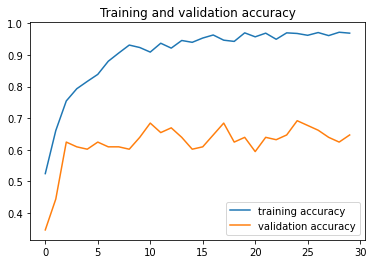

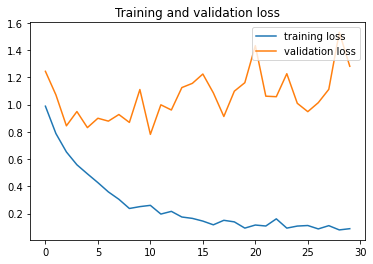

In [ ]:
## Accuracy and Loss plots

accuracy = tr_history4.history['accuracy']
val_accuracy = tr_history4.history['val_accuracy']
loss = tr_history4.history['loss']
val_loss = tr_history4.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
# Saving model and its weights for future use

model_resnet50.save('resnet50.h5')
model_resnet50.save_weights('resnet50_weights.h5')

#### MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNet(input_shape=X_train[0].shape,
                       weights='imagenet',
                       include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512,activation='relu')(x) #dense layer 2
x = Dense(256,activation='relu')(x) #dense layer 3
preds = Dense(3,activation='softmax')(x) #final layer with softmax activation

model_mobilenet = Model(inputs=base_model.input,
                        outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_mobilenet.layers[:20]:
    layer.trainable=False
for layer in model_mobilenet.layers[20:]:
    layer.trainable=True

# Compile the model
model_mobilenet.compile(optimizer='Adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

model_mobilenet.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128 

In [ ]:
# Model with the non-trainable first 20 layers 

tr_history5 = model_mobilenet.fit(x=X_train, 
                                  y=y_train_onehot, 
                                  batch_size=64, 
                                  epochs=30, 
                                  validation_data=(X_val, y_val_onehot))

Epoch 1/30
17/17 [==============================] - 5s 128ms/step - loss: 0.6966 - accuracy: 0.7476 - val_loss: 2.6327 - val_accuracy: 0.5263
Epoch 2/30
17/17 [==============================] - 1s 62ms/step - loss: 0.1397 - accuracy: 0.9565 - val_loss: 1.6810 - val_accuracy: 0.7218
Epoch 3/30
17/17 [==============================] - 1s 62ms/step - loss: 0.0750 - accuracy: 0.9758 - val_loss: 2.2403 - val_accuracy: 0.6842
Epoch 4/30
17/17 [==============================] - 1s 63ms/step - loss: 0.0867 - accuracy: 0.9729 - val_loss: 1.5279 - val_accuracy: 0.7368
Epoch 5/30
17/17 [==============================] - 1s 61ms/step - loss: 0.0989 - accuracy: 0.9642 - val_loss: 0.6765 - val_accuracy: 0.8647
Epoch 6/30
17/17 [==============================] - 1s 62ms/step - loss: 0.0637 - accuracy: 0.9768 - val_loss: 1.0314 - val_accuracy: 0.8346
Epoch 7/30
17/17 [==============================] - 1s 62ms/step - loss: 0.0478 - accuracy: 0.9884 - val_loss: 0.5953 - val_accuracy: 0.9098
Epoch 8/30
1

Text(0.5, 1.0, 'Training and validation loss')

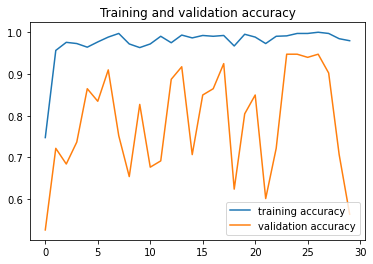

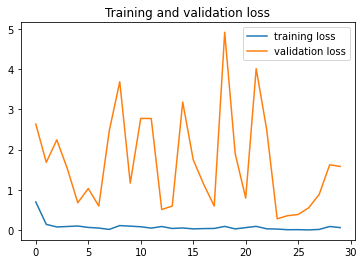

In [ ]:
## Accuracy and Loss plots

accuracy = tr_history5.history['accuracy']
val_accuracy = tr_history5.history['val_accuracy']
loss = tr_history5.history['loss']
val_loss = tr_history5.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [ ]:
# Saving model and its weights for future use

model_mobilenet.save('mobilenet.h5')
model_mobilenet.save_weights('mobilenet_weights.h5')

### Loading the saved models and doing the prediction

In [ ]:
from tensorflow.keras.models import load_model

# Loading MobileNet
model_mobilenet = load_model('mobilenet.h5')

# Loading VGG16
model_vgg16 = load_model('vgg16.h5')

# Loading VGG19
model_vgg19 = load_model('vgg19.h5')

# Loading Resnet50
model_resnet50 = load_model('resnet50.h5')


In [ ]:
import numpy as np
import cv2

# Preprocessing the test data before prediction
X_test = []
y_test = []
labels = []
height = 128
width = 128

for i in os.listdir(os.path.join('test')):
    if i !='.DS_Store':
        labels.append(i)
        for j in os.listdir(os.path.join('test', i)):
            if j != '.DS_Store':
                image = cv2.imread(os.path.join('test', i, j))
                image = cv2.resize(image, (height, width))
                X_test.append(image)
                y_test.append(i)

print(labels)
X_test_array = np.array(X_test)

['healthy', 'angular_leaf_spot', 'bean_rust']


In [ ]:
print(X_test_array.shape)
print(len(y_test))
print(labels)

(128, 128, 128, 3)
128
['healthy', 'angular_leaf_spot', 'bean_rust']


MobileNet
Softmax Outputs: [[0.95449585 0.00993977 0.0355644 ]]
Predicted_Label_mobilenet: healthy
------------------------------------------------------------
VGG16
Softmax Outputs: [[0. 0. 1.]]
Predicted_Label_vgg16: bean_rust
------------------------------------------------------------
VGG19
Softmax Outputs: [[0. 0. 1.]]
Predicted_Label_vgg19: bean_rust
------------------------------------------------------------
ResNet50
Softmax Outputs: [[0.9617757  0.02950886 0.00871546]]
Predicted_Label_resnet50: healthy


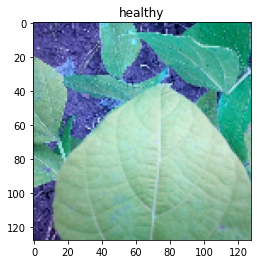

In [ ]:
# Predicting and vizualizing the test image using pretrained Models

import matplotlib.pyplot as plt
%matplotlib inline

n = 15

plt.title(y_test[n])
plt.imshow(X_test[n])

# MobileNet
print('MobileNet')
y_pred_mn = model_mobilenet.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_mn)

# Convert the predicted probabilities to labels
for i in y_pred_mn:
    for j, k in enumerate(i):
        if k == y_pred_mn.max():
            print('Predicted_Label_mobilenet:', labels[j])


# VGG16
print('-'*60)
print('VGG16')
y_pred_vgg16 = model_vgg16.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_vgg16)

# Convert the predicted probabilities to labels
for i in y_pred_vgg16:
    for j, k in enumerate(i):
        if k == y_pred_vgg16.max():
            print('Predicted_Label_vgg16:', labels[j])


# VGG19
print('-'*60)
print('VGG19')
y_pred_vgg19 = model_vgg19.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_vgg19)

# Convert the predicted probabilities to labels
for i in y_pred_vgg19:
    for j, k in enumerate(i):
        if k == y_pred_vgg19.max():
            print('Predicted_Label_vgg19:', labels[j])

# ResNet50
print('-'*60)
print('ResNet50')
y_pred_rn = model_resnet50.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_rn)

# Convert the predicted probabilities to labels
for i in y_pred_rn:
    for j, k in enumerate(i):
        if k == y_pred_rn.max():
            print('Predicted_Label_resnet50:', labels[j])


## Happy Learning:)